In [1]:
import utilities as utils

/home/drake/miniconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index



    Last Execution: 2022-05-14 14:22:35.648004
    python:	3.8.5

    	fastai:		2.5.6
    	matplotlib:	3.5.1
    	numpy:		1.20.0
    	pandas:		1.4.1
    	seaborn:	0.11.2
    	sklearn:	1.0.2
    	torch:		1.11.0+cu102
    	yellowbrick:	1.4
    	imblearn:	0.9.0
    


In [2]:
data_path_1: str = './synthetic/'   
data_path_2: str = '../../../Data/phase2/'  
data_path_3: str = '../../../Data/phase1/'    

data_set_1: list = [ 'smote_application_30000.csv', 
                     'smote_application_upsample_to_majority.csv',
                     'smote_traffic_30_20_10.csv',
                     'smote_traffic_upsample_to_majority.csv']

data_set_2: list = [ 'Traffic_type_test.csv', 'Application_type_test.csv' ] 

data_set_3: list = [ 'Traffic_type_seed.csv', 'Application_type_seed.csv' ] 


file_path_1       = utils.get_file_path(data_path_1)
file_path_2       = utils.get_file_path(data_path_2)
file_path_3       = utils.get_file_path(data_path_3)
file_set_1 : list = list(map(file_path_1, data_set_1))
file_set_2 : list = list(map(file_path_2, data_set_2))
file_set_3 : list = list(map(file_path_2, data_set_3))

file_set : list   = file_set_1 + file_set_2 + file_set_3
data_set   : list = data_set_1 + data_set_2 + data_set_3
current_job: int  = 0

utils.data_set = data_set
utils.file_set = file_set

In [3]:
print(f'We will be using {len(file_set)} files:')
utils.pretty(file_set)

We will be using 8 files:
[   './synthetic/smote_application_30000.csv',
    './synthetic/smote_application_upsample_to_majority.csv',
    './synthetic/smote_traffic_30_20_10.csv',
    './synthetic/smote_traffic_upsample_to_majority.csv',
    '../../../Data/phase2/Traffic_type_test.csv',
    '../../../Data/phase2/Application_type_test.csv',
    '../../../Data/phase2/Traffic_type_seed.csv',
    '../../../Data/phase2/Application_type_seed.csv']


In [4]:
smote_balanced_application_dataset_labels_30_30_30 = utils.examine_dataset(1)
smote_balanced_application_dataset_labels_equal = utils.examine_dataset(2)
smote_balanced_traffic_labels_dataset_30_20_10 = utils.examine_dataset(3)
smote_balanced_traffic_labels_dataset_equal = utils.examine_dataset(4)
baseline_traffic_test = utils.examine_dataset(5)
baseline_application_test = utils.examine_dataset(6)
baseline_traffic_seed = utils.examine_dataset(7)
baseline_application_seed = utils.examine_dataset(8)

Dataset 1/8: We now look at ./synthetic/smote_application_30000.csv


Loading Dataset: ./synthetic/smote_application_30000.csv
	To Dataset Cache: ./cache/smote_application_30000.csv.pickle


        File:				./synthetic/smote_application_30000.csv  
        Job Number:			1
        Shape:				(240000, 64)
        Samples:			240000 
        Features:			64
    
Dataset 2/8: We now look at ./synthetic/smote_application_upsample_to_majority.csv


Loading Dataset: ./synthetic/smote_application_upsample_to_majority.csv
	To Dataset Cache: ./cache/smote_application_upsample_to_majority.csv.pickle


        File:				./synthetic/smote_application_upsample_to_majority.csv  
        Job Number:			2
        Shape:				(384160, 64)
        Samples:			384160 
        Features:			64
    
Dataset 3/8: We now look at ./synthetic/smote_traffic_30_20_10.csv


Loading Dataset: ./synthetic/smote_traffic_30_20_10.csv
	To Dataset Cache: ./cache/smote_traffic_30_20_10.csv.pickle


        File:				./synthetic/smo

In [5]:
smote_balanced_application_30_30_30 : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(smote_balanced_application_dataset_labels_30_30_30, ['Traffic Type']), 'Application_Dataset_30_30_30')
smote_balanced_application_majority : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(smote_balanced_application_dataset_labels_equal, ['Traffic Type']), 'Application_Dataset_majority')
smote_balanced_traffic_30_20_10     : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(smote_balanced_traffic_labels_dataset_30_20_10, ['Application Type']), 'Traffic_Dataset_30_20_10')
smote_balanced_traffic_majority     : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(smote_balanced_traffic_labels_dataset_equal, ['Application Type']), 'Traffic_Dataset_majority')
baseline_traffic_test               : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(baseline_traffic_test, ['Application Type']), 'Traffic_Dataset_test')
baseline_application_test           : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(baseline_application_test, ['Traffic Type']), 'Application_Dataset_test')
baseline_traffic_seed               : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(baseline_traffic_seed, ['Application Type']), 'Traffic_Dataset_seed')
baseline_application_seed           : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(baseline_application_seed, ['Traffic Type']), 'Application_Dataset_seed')


        Shape:				(240000, 63)
        Samples:			240000 
        Features:			63
    

        Shape:				(384160, 63)
        Samples:			384160 
        Features:			63
    

        Shape:				(60000, 63)
        Samples:			60000 
        Features:			63
    

        Shape:				(277977, 63)
        Samples:			277977 
        Features:			63
    

        Shape:				(1950, 63)
        Samples:			1950 
        Features:			63
    

        Shape:				(4000, 63)
        Samples:			4000 
        Features:			63
    

        Shape:				(115670, 63)
        Samples:			115670 
        Features:			63
    

        Shape:				(113620, 63)
        Samples:			113620 
        Features:			63
    


In [6]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
def run_shallow_learning_experiment(df: utils.pd.DataFrame, name: str, target_label: str, classifier, param_grid: str, split=0.2, categorical : list = ['Protocol'], leave_out: list = []) -> utils.Model_data:
    '''
        Run binary classification using a shallow learning model
        returns the 10-tuple Model_data
    '''

    # First we split the features into the dependent variable and 
    # continous and categorical features
    dep_var: str = target_label

    categorical_features: list = []
    untouched_features  : list = []

    for x in categorical:
        if x in df.columns:
            categorical_features.append(x)

    for x in leave_out:
        if x in df.columns:
            untouched_features.append(x)
        
    continuous_features = list(set(df) - set(categorical_features) - set([dep_var]) - set(untouched_features))

    # Next, we set up the feature engineering pipeline, namely filling missing values
    # encoding categorical features, and normalizing the continuous features
    # all within a pipeline to prevent the normalization from leaking details
    # about the test sets through the normalized mapping of the training sets
    procs = [utils.FillMissing, utils.Categorify, utils.Normalize]
    splits = utils.RandomSplitter(valid_pct=split, seed=utils.seed)(utils.range_of(df))
    
    # The dataframe is loaded into a fastai datastructure now that 
    # the feature engineering pipeline has been set up
    to = utils.TabularPandas(
        df            , y_names=dep_var                , 
        splits=splits , cat_names=categorical_features ,
        procs=procs   , cont_names=continuous_features , 
    )

    # We use fastai to quickly extract the names of the classes as they are mapped to the encodings
    dls = to.dataloaders(bs=64)
    model = utils.tabular_learner(dls)
    classes : list = list(model.dls.vocab)


    # extract the name from the path
    p = utils.pathlib.Path(name)
    name: str = str(p.parts[-1])


    # We extract the training and test datasets from the dataframe
    X_train = to.train.xs.reset_index(drop=True)
    X_test = to.valid.xs.reset_index(drop=True)
    y_train = to.train.ys.values.ravel()
    y_test = to.valid.ys.values.ravel()


    # Now that we have the train and test datasets, we set up a gridsearch of the K-NN classifier
    # using SciKitLearn and print the results 
    pipe = utils.Pipeline([
    ('scaler', utils.StandardScaler()),
    ('selector', utils.VarianceThreshold()),
    ('classifier', classifier)
    ])
    pipe.fit(X_train, y_train)
    model = utils.GridSearchCV(pipe, param_grid, cv=3).fit(X_train, y_train)
    prediction = model.predict(X_test)
    prediction_prob = model.predict_proba(X_test)
    report = utils.classification_report(y_test, prediction)
    print(f"Results for {name}")
    print(report)
    print(f'\tAccuracy: {utils.accuracy_score(y_test, prediction)}\n')
    print(f'\tF1: {utils.f1_score(y_test, prediction, average="weighted")}\n')
    print(f'\tAUC: {utils.roc_auc_score(y_test, prediction_prob, multi_class="ovr")}\n')
    print(f'\tMathew\'s Correlation: {utils.matthews_corrcoef(y_test, prediction)}\n')

   # we add a target_type_ attribute to our model so yellowbrick knows how to make the visualizations
    if len(classes) == 2:
        model.target_type_ = 'binary'
    elif len(classes) > 2:  
        model.target_type_ = 'multiclass'
    else:
        print('Must be more than one class to perform classification')
        raise ValueError('Wrong number of classes')

    model_data: utils.Model_data = utils.Model_data(name, model, classes, X_train, y_train, X_test, y_test, to, dls, name)

    
    # Now that the classifier has been created and trained, we pass out our training values
    # for analysis and further experimentation
    return model_data

In [87]:
def visualize_report(model_data: tuple, ax=None, cmap='Blues') -> utils.yb.classifier:
    '''
        Takes a 10-tuple from the run_experiments function and creates a report
        detailing the Precision, Recall, f1, and Support scores for all 
        classification outcomes

        model_data: tuple = (name, model, classes, X_train, y_train, X_test, y_test, to, dls, model_type)
    '''
    new_classes = {}
    for i,x in reversed(list(enumerate(model_data.classes))):
        new_classes[i] = x
    visualizer = utils.yb.classifier.ClassificationReport(model_data[1], classes=model_data.classes, title=model_data[0], ax=ax, cmap=cmap, is_fitted=True, support=True)
    visualizer.score(model_data[5], model_data[6])

    return visualizer

def visualize_confusion_matrix(model_data: tuple, ax=None, cmap='Blues') -> utils.yb.classifier:
    '''
        Takes a 10-tuple from the run_experiments function and creates a confusion matrix

        model_data: tuple = (name, model, classes, X_train, y_train, X_test, y_test, to, dls, model_type)
    '''

    visualizer = utils.yb.classifier.ConfusionMatrix(model_data[1], classes=model_data[2], title=model_data[0], ax=ax, cmap=cmap, is_fitted=True)
    visualizer.score(model_data[5], model_data[6])

    
    return visualizer


In [218]:
def visualize_side_by_side(
    model_datum: list,
    title: str = "Confusion Matrices",
    model_descriptions: list or None = None,
    plotting_function: callable = utils.visualize_confusion_matrix,
    shape: tuple = (2,5),
    size: tuple = (20,10),
    x_label: str = 'Predicted',
    y_label: str = 'True'
) -> tuple:
    '''
        Function will take the plotting function and execute it on each Model_data tuple passed in through the model_datum list
            The plots will be oriented in a subplot grid with the number of rows and columns specified by the shape tuple
            average accuracy will be calculated and displayed in the subtitle of the figure
            
    '''

    print('Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model')
    rows = shape[0]
    cols = shape[1]

    fig, ax = utils.plt.subplots(nrows=rows, ncols=cols, figsize=size)
    fig.suptitle(title)

    viz: list = [0] * len(model_datum)
    for i in range(rows*cols):
        row = i // cols
        col = i % cols
        if i < len(model_datum):
            if(rows == 1):
                current_ax = ax[col]
            else:
                current_ax = ax[row][col]
            if(col == cols-1):
                visualizer = utils.yb.classifier.ClassificationReport(model_datum[i][1], classes=model_datum[i].classes, title=model_datum[i][0], is_fitted=True, support=True,ax=current_ax,cmap='Blues')
                custom_report(visualizer,model_datum[i])
                #viz[i] = visualize_report(model_datum[i], ax=current_ax)
                #viz[i].finalize()
            else:
                viz[i] = visualize_confusion_matrix(model_datum[i], ax=current_ax)
                viz[i].finalize()
                
            
           
            if model_descriptions is not None:
                current_ax.set_title(model_descriptions[i])

        if(row == rows-1):
            current_ax.set_xlabel(x_label)
        else:
            current_ax.set_xlabel('')
            current_ax.xaxis.set_ticklabels([])

        if(col == 0):
            current_ax.set_ylabel(y_label)
        else:
            current_ax.set_ylabel('')
            current_ax.yaxis.set_ticklabels([])

    utils.plt.tight_layout()

    return (fig, ax)

['precision', 'recall', 'f1', 'support']


<AxesSubplot:title={'center':'Baseline'}>

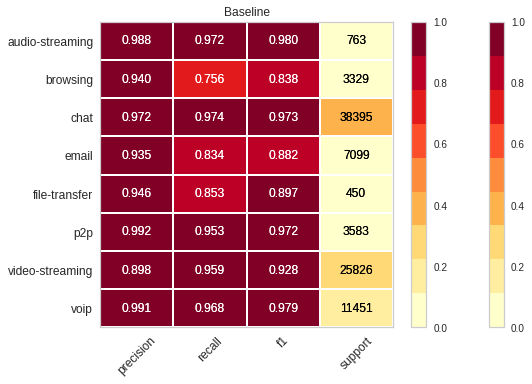

In [129]:
visualizer = utils.yb.classifier.ClassificationReport(baseline_results_application[1], classes=baseline_results_application.classes, title=baseline_results_application[0], is_fitted=True, support=True)
visualizer.score(baseline_results_application.X_train, baseline_results_application.y_train)
#print(visualizer.scores_)
reversed_scores_= {}
for metric in visualizer.scores_:
    reversed_scores_[metric] = {}
    for value in sorted(visualizer.scores_[metric].keys()):
        reversed_scores_[metric][value] = visualizer.scores_[metric][value]
visualizer.scores_ = reversed_scores_
print(visualizer._displayed_scores)
visualizer.draw()

In [266]:
from yellowbrick.style import find_text_color

from sklearn.metrics import precision_recall_fscore_support
SCORES_KEYS = ("precision", "recall", "f1", "support")

def custom_report(visualizer, model_data):
    y_pred = model_data.model.predict(model_data.X_test)
    scores = precision_recall_fscore_support(model_data.y_test, y_pred)

    # Calculate the percentage for the support metric
    # and store the percent in place of raw support counts
    visualizer.support_score_ = scores[-1]

    scores = list(scores)
    scores[-1] = scores[-1] / scores[-1].sum()

    # Create a mapping composed of precision, recall, F1, and support
    # to their respective values
    scores = map(lambda s: dict(zip(visualizer.classes_, s)), scores)
    visualizer.scores_ = dict(zip(SCORES_KEYS, scores))

    reversed_scores_= {}
    for metric in visualizer.scores_:
        reversed_scores_[metric] = {}
        for value in sorted(visualizer.scores_[metric].keys()):
            reversed_scores_[metric][value] = visualizer.scores_[metric][value]
    visualizer.scores_ = reversed_scores_
    #print(visualizer._displayed_scores, visualizer.scores_)

    visualizer.classes_ = visualizer.classes_[::-1]
    cr_display = utils.np.zeros((len(visualizer.classes_), len(visualizer._displayed_scores)))

    # For each class row, append columns for precision, recall, f1, and support
    for idx, cls in enumerate(visualizer.classes_):
        for jdx, metric in enumerate(visualizer._displayed_scores):
            cr_display[idx, jdx] = visualizer.scores_[metric][cls]

    #print(cr_display)
    rev_cr_display = cr_display[::-1]
    #print()
    #print(cr_display) 
    # Set up the dimensions of the pcolormesh
    # NOTE: pcolormesh accepts grids that are (N+1,M+1)
    X, Y = (
        utils.np.arange(len(visualizer.classes_) + 1),
        utils.np.arange(len(visualizer._displayed_scores) + 1),
    )
    visualizer.ax.set_ylim(bottom=0, top=cr_display.shape[0])
    visualizer.ax.set_xlim(left=0, right=cr_display.shape[1])

    # Get the human readable labels
    labels = visualizer._labels()
    if labels is None:
        labels = visualizer.classes_

    # Fetch the grid labels from the classes in correct order; set ticks.
    xticklabels = visualizer._displayed_scores
    yticklabels = labels[::-1]


    yticks = utils.np.arange(len(labels)) + 0.5
    xticks = utils.np.arange(len(visualizer._displayed_scores)) + 0.5

    visualizer.ax.set(yticks=yticks, xticks=xticks)

    visualizer.ax.set_xticklabels(
        xticklabels, rotation=45, fontsize=visualizer.fontsize
        )
    #    visualizer.ax.set_yticklabels(yticklabels, fontsize=visualizer.fontsize)



    # Set data labels in the grid, enumerating over class, metric pairs
    # NOTE: X and Y are one element longer than the classification report
    # so skip the last element to label the grid correctly.
    i=len(X)-2
    for x in X[:-1]:
        for y in Y[:-1]:

            # Extract the value and the text label
            value = cr_display[x, y]
            rev_value = rev_cr_display[x, y]
            #print(x,y,value)
            svalue = "{:0.3f}".format(value)

            # change the svalue for support (when y == 3) because we want
            # to label it as the actual support value, not the percentage
            if y == 3:
                if visualizer.support != "percent":
                    svalue = visualizer.support_score_[i]
                    i-=1
                    
            # Determine the grid and text colors
            base_color = visualizer.cmap(rev_value)
            text_color = find_text_color(visualizer.cmap(value))

            # Add the label to the middle of the grid
            cx, cy = x + 0.5, y + 0.5
            visualizer.ax.text(cy, cx, svalue, va="center", ha="center", color=text_color)
    # Draw the heatmap with colors bounded by the min and max of the grid
    # NOTE: I do not understand why this is Y, X instead of X, Y it works
    # in this order but raises an exception with the other order.
    
    #visualizer.classes_ = visualizer.classes_[::-1]
    #cr_display = cr_display[::-1]
    g = visualizer.ax.pcolormesh(
        Y, X, cr_display, vmin=0, vmax=1, cmap=visualizer.cmap, edgecolor="w"
    )

    # Add the color bar
    if visualizer.colorbar:
        utils.plt.colorbar(g, ax=visualizer.ax)  # TODO: Could use self.fig now
    else:
        pass


# Traffic Classification

In [9]:
xgb_param_grid = {
        "classifier__n_estimators": [100],
        'classifier__max_depth': [2,6,12],
        'classifier__min_child_weight': [4,10],
        "classifier__eval_metric": ["mlogloss"]
}

smote_results = run_shallow_learning_experiment(smote_balanced_traffic_majority['Dataset'], "Baseline",'Traffic Type', utils.LGBMClassifier(), xgb_param_grid)
baseline_results = run_shallow_learning_experiment(baseline_traffic_seed['Dataset'], "Baseline",'Traffic Type', utils.LGBMClassifier(), xgb_param_grid)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
Results for Baseline
              precision    recall  f1-score

In [10]:
new_dls = baseline_results.dls.test_dl(baseline_traffic_test['Dataset'], bs=64)
balanced_baseline = utils.Model_data(baseline_results[0], baseline_results[1], baseline_results[2], baseline_results[3], baseline_results[4], new_dls.xs, new_dls.ys, baseline_results[7], baseline_results[8], baseline_results[9])
new_dls = smote_results.dls.test_dl(baseline_traffic_test['Dataset'], bs=64)
smote_final_results = utils.Model_data(smote_results[0], smote_results[1], smote_results[2], smote_results[3], smote_results[4], new_dls.xs, new_dls.ys, smote_results[7], smote_results[8], smote_results[9])


Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/tmp/ipykernel_7148/3305494476.py:106: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/tmp/ipykernel_7148/3305494476.py:112: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/tmp/ipykernel_7148/3305494476.py:106: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/tmp/ipykernel_7148/3305494476.py:112: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/tmp/ipykernel_7148/3305494476.py:106: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and 

(<Figure size 504x576 with 9 Axes>,
 array([[<AxesSubplot:title={'center':'Imbalanced Control'}, ylabel='True'>,
         <AxesSubplot:title={'center':'Imbalanced Control'}>],
        [<AxesSubplot:title={'center':'Balanced Control'}, ylabel='True'>,
         <AxesSubplot:title={'center':'Balanced Control'}>],
        [<AxesSubplot:title={'center':'SMOTE'}, xlabel='Predicted', ylabel='True'>,
         <AxesSubplot:title={'center':'SMOTE'}, xlabel='Predicted'>]],
       dtype=object))

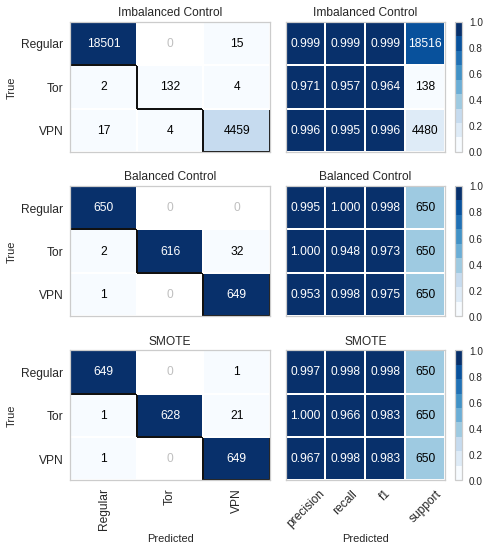

In [278]:
visualize_side_by_side([baseline_results, baseline_results, balanced_baseline, balanced_baseline, smote_final_results, smote_final_results], "", ['Imbalanced Control', 'Imbalanced Control', 'Balanced Control', 'Balanced Control','SMOTE','SMOTE'], shape=(3,2), size=(7,8))

# Application Classification

In [11]:
xgb_param_grid = {
        "classifier__n_estimators": [100],
        'classifier__max_depth': [2,6,12],
        'classifier__min_child_weight': [4,10],
        "classifier__eval_metric": ["mlogloss"]
}

baseline_results_application = run_shallow_learning_experiment(baseline_application_seed['Dataset'], "Baseline",'Application Type', utils.LGBMClassifier(), xgb_param_grid)
smote_results_application = run_shallow_learning_experiment(smote_balanced_application_30_30_30['Dataset'], "Baseline",'Application Type', utils.LGBMClassifier(), xgb_param_grid)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
Results for Baseline
              precision    recall  f1-score

In [12]:
new_dls = baseline_results_application.dls.test_dl(baseline_application_test['Dataset'], bs=64)
balanced_baseline_application = utils.Model_data(baseline_results_application[0], baseline_results_application[1], baseline_results_application[2], baseline_results_application[3], baseline_results_application[4], new_dls.xs, new_dls.ys, baseline_results_application[7], baseline_results_application[8], baseline_results_application[9])
new_dls = smote_results_application.dls.test_dl(baseline_application_test['Dataset'], bs=64)
smote_final_results_application = utils.Model_data(smote_results_application[0], smote_results_application[1], smote_results_application[2], smote_results_application[3], smote_results_application[4], new_dls.xs, new_dls.ys, smote_results_application[7], smote_results_application[8], smote_results_application[9])


Ignore yellowbrick warnings, this is a side-effect of using the sklearn wrapper on the fastai model


/tmp/ipykernel_7148/3305494476.py:106: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/tmp/ipykernel_7148/3305494476.py:112: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/tmp/ipykernel_7148/3305494476.py:106: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/tmp/ipykernel_7148/3305494476.py:112: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/tmp/ipykernel_7148/3305494476.py:106: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and 

(<Figure size 720x792 with 9 Axes>,
 array([[<AxesSubplot:title={'center':'Imbalanced Control'}, ylabel='True'>,
         <AxesSubplot:title={'center':'Imbalanced Control'}>],
        [<AxesSubplot:title={'center':'Balanced Control'}, ylabel='True'>,
         <AxesSubplot:title={'center':'Balanced Control'}>],
        [<AxesSubplot:title={'center':'SMOTE'}, xlabel='Predicted', ylabel='True'>,
         <AxesSubplot:title={'center':'SMOTE'}, xlabel='Predicted'>]],
       dtype=object))

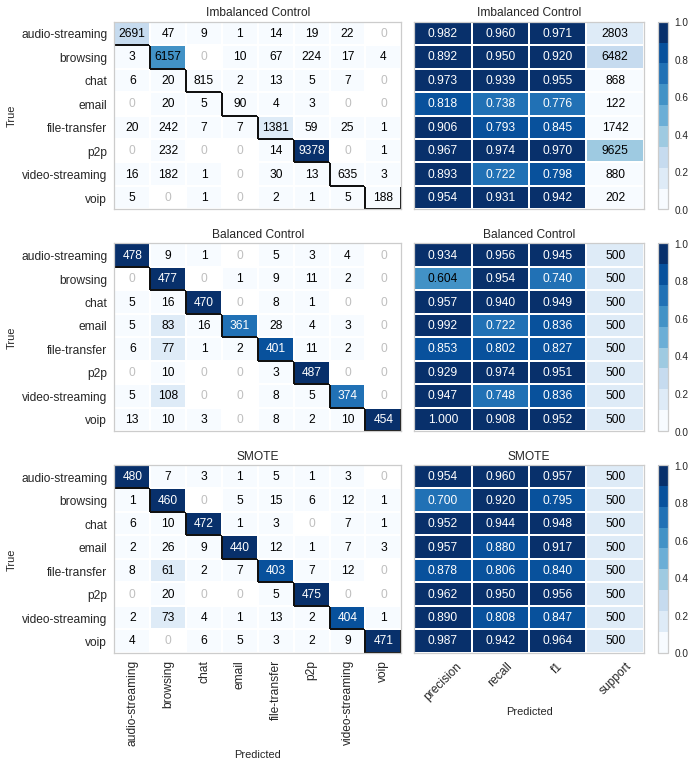

In [273]:
visualize_side_by_side([baseline_results_application, baseline_results_application,  balanced_baseline_application, balanced_baseline_application, smote_final_results_application, smote_final_results_application], title="", model_descriptions= ['Imbalanced Control', 'Imbalanced Control', 'Balanced Control', 'Balanced Control','SMOTE','SMOTE'], shape=(3,2), size=(10,11))